*Teams 1,3 & 5*

We have to solve the following problem

$$\begin{cases}
\partial_tu(t,x)=\beta \partial_x^2 u(t,x)+f(t,x)\\
u(t=0, x)=u^0\\
u(t=0,x)=u_1 cos(\frac{\pi x}{2L}) \\
\partial_x(t,x=L)=0  \\
\end{cases} (0)$$
with $f(t,x)=(T_0 + \frac{x^2}{L^2}(T_1-T_0))\frac{1}{2-e^{\frac{-t}{\tau}}}$ and $T_1>0$

Let us remind the problems each team had to solve

**Team 1's problem**
$$ \begin{cases}
\partial_t u = f\\
u(t=0,x)=u^0=u_1 cos(\frac{\pi x}{2L}) \\
\end{cases} (1)$$
Leading to the following discretized problem 
$\begin{cases} 
v^0=u^0 \\
\forall n \in \llbracket 1,N \rrbracket, v^{n+1}=v^n+h_tf(t^n, x)
\end{cases}$

As $(v_n)_{n \in \N}\in (\R^{J+1})^{\N}$, we can rewrite the problem distinguishing each coordinate of $v_n$. We denote 
$$F :\begin{cases} [0,T] \to \R^{J+1}\\
t \mapsto \begin{bmatrix} f(t,x_1)\\
\vdots \\
f(t,x_{J+1}) \end{bmatrix}\\
\end{cases}$$ 

yielding to the following discretized problem in matrix form: 

$\begin{cases} 
V^0=U^0=\begin{bmatrix} u_1 cos(\frac{\pi x_1}{2L}) \\
\vdots \\
u_1 cos(\frac{\pi x_{J+1}}{2L})\end{bmatrix} \\
\forall n \in \llbracket 1,N \rrbracket, V^{n+1}=V^n+h_t F(t^n) \\
\end{cases}$

**Team 3's problem**
$$ \begin{cases}
f =+ \beta \partial^2_x u =0\\
u(t=0,x)=u_1 cos(\frac{\pi x}{2L}) \\
\partial_x(t,x=L)=0
\end{cases} (3)$$
Leading to the following discretized problem when $\alpha=0$
$\begin{cases} 
V^0=U^0 \\
\forall n \in \llbracket 1,N \rrbracket, A V^{n}=F(t^n)
\end{cases}$

with $$ X = \begin{bmatrix} 
 x_1 \\
\vdots \\
x_{J+1} \\
\end{bmatrix} $$

$$A = -\frac{\beta}{h_x^2}\begin{bmatrix} 
 2 & -1 &  & &  \\
 -1 & 2 & -1 & & \\
  & \ddots & \ddots & \ddots & \\
  & & -1 & 2 & -1 \\
  & & & -2 & 2 \\
\end{bmatrix} 
$$

**Team 5's problem**
$$ \begin{cases}
\partial_t u = \beta \partial^2_x u \\
u(t, x=0)=a \\
u(t=0,x)=u_1 cos(\frac{\pi x}{2L}) \\
\partial_x(t,x=L)=0
\end{cases} (5) $$
Leading to the following discretized problem 
$\begin{cases} 
V^0=U^0 \\
\forall n \in \llbracket 1,N \rrbracket, V^{n+1}=(\frac{-h_t \beta}{h_x^2}D + I_{J+1})V^n +C = BV^n + C
\end{cases}$

with 
$$ V^n = \begin{bmatrix} 
 v_1^n \\
 \vdots \\
v_{J+1}^n \\
\end{bmatrix} \\~\\

D= \begin{bmatrix}
 2 & -1 &  & & 0 \\
 -1 & 2 & -1 &  &  \\
  & \ddots & \ddots & \ddots &  \\
 &  & -1 & 2 & -1\\
0 &  &  & -1 & 1\\ \end{bmatrix} \\~\\
C= \begin{bmatrix}
\frac{\beta a}{h_x^2} \\
0 \\
\vdots \\
0 \end{bmatrix}$$

We noticed that $(0) \iff (1)+(3)+(5)$ after simplification of the factor 2 appearing when summing the problems

Thus we thought of summing up all of our discretized problems as well to get the expression of our approximated solution solving (0). 

This gave us

$\begin{cases} 
V^0=U^0 \\
\forall n \in \llbracket 1,N \rrbracket, V^{n+1}= \frac{1}{2}[ (I_{J+1} + B - A) V^n +(h_t + 1)F(t^n) + C]
\end{cases}$

We can thus implement this new numerical scheme in python to find our approximate solution

In [210]:
import numpy as np

#Parameters definiton 
L= 1
J= 100
N=100
T=1
u1=1
T0=1
T1=1
tau=1
k=1
beta=1
a=1

# Source
def f(t,x):
    return T0*(1+np.cos(k*np.pi*x/L))*1/(1+np.exp(-t/tau))

#Def of the matrices of the numerical scheme
def matrices_def(L,J,T,N, beta):
    h_t=T/(N+1)
    h_x=L/(N+1)
    
    D= 2*np.eye(J+1)-1*np.eye(J+1, k=-1)-1*np.eye(J+1, k=1)
    D[J][J]-=1
    B = -h_t*beta/h_x**2*D+np.eye(J+1)
    
    A1=2*np.eye(J+1)-1*np.eye(J+1, k=-1)-1*np.eye(J+1, k=1)
    A1[J,J-1]-=1
    A=-beta/h_x**2*A1
    return A,B

#Numerical scheme 
def num_scheme_135(u1, J, L, N, T, beta,a): 
    h_x=L/(J+1)
    h_t=T/(N+1)
    
    def F(n):
        F=np.array([f(n*h_t, j*h_x) for j in range(1,J+2)])
        F[0]+=beta*a/(h_x**2)
        return F
    
    print("F(0):", F(0))

    X = np.array([j*h_x for j in range(1,J+2)])
    I = np.eye(J+1)
    A, B = matrices_def(L,J,T,N, beta)
    C= np.append(beta*a/h_x**2, [0]*J)
    V0=np.array([u1*np.cos((np.pi*j*h_x)/(2*L)) for j in range(1,J+2)])
    V=np.zeros((J+1,N+1))
    V[0,:]=V0
    Time=np.append(0, np.empty(J))
    
    print("Matrix B:", B)
    print("Matrix A:", A)
    print("V0:", V0)
    
    M = np.eye(J+1) + B - A 
    for n in range(N):
        V[:, n + 1] = 0.5 * (np.dot(M, V[:, n]) + (h_t + 1) * F(n) + C)
        if np.isnan(V[:, n]).any():
            print(f"NaN detected at time step n = {n}")
            break
        Time[n+1]=((n+1)*h_t)
        
    return V, Time, X 

V, Time, X = num_scheme_135(u1, J, L, N, T, beta, a)

F(0): [1.02019998e+04 9.99032799e-01 9.97824674e-01 9.96134936e-01
 9.93965220e-01 9.91317624e-01 9.88194710e-01 9.84599500e-01
 9.80535470e-01 9.76006554e-01 9.71017132e-01 9.65572031e-01
 9.59676519e-01 9.53336301e-01 9.46557508e-01 9.39346700e-01
 9.31710852e-01 9.23657352e-01 9.15193991e-01 9.06328957e-01
 8.97070825e-01 8.87428554e-01 8.77411470e-01 8.67029264e-01
 8.56291982e-01 8.45210010e-01 8.33794070e-01 8.22055206e-01
 8.10004774e-01 7.97654432e-01 7.85016129e-01 7.72102091e-01
 7.58924812e-01 7.45497040e-01 7.31831766e-01 7.17942209e-01
 7.03841807e-01 6.89544202e-01 6.75063225e-01 6.60412885e-01
 6.45607356e-01 6.30660962e-01 6.15588161e-01 6.00403536e-01
 5.85121778e-01 5.69757669e-01 5.54326075e-01 5.38841924e-01
 5.23320195e-01 5.07775906e-01 4.92224094e-01 4.76679805e-01
 4.61158076e-01 4.45673925e-01 4.30242331e-01 4.14878222e-01
 3.99596464e-01 3.84411839e-01 3.69339038e-01 3.54392644e-01
 3.39587115e-01 3.24936775e-01 3.10455798e-01 2.96158193e-01
 2.82057791e-01 2.

In [209]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Run the numerical scheme
V, Time, X = num_scheme_135(u1, J, L, N, T, beta, a)
print("V min:", np.min(V))
print("V max:", np.max(V))
print("V shape:", V.shape)
# Create meshgrid for plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

T_mesh, X_mesh = np.meshgrid(Time, X)

# Add a small offset to avoid singularities
V_plot = V + 1e-9 * np.random.rand(*V.shape)

ax.plot_surface(X_mesh, T_mesh, V_plot, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('V')
ax.set_zlim(np.min(V_plot), np.max(V_plot) + 1e-6)

plt.show()

V min: nan
V max: nan
V shape: (101, 101)


ValueError: Axis limits cannot be NaN or Inf

Error in callback <function _draw_all_if_interactive at 0x000001A5344B7F40> (for post_execute):


LinAlgError: Singular matrix

LinAlgError: Singular matrix

<Figure size 1000x700 with 1 Axes>

**Teams 2,4 & 5**

Problem to solve : 

$$\begin{cases}
\partial_tu(t,x)=\beta \partial_x^2 u(t,x)+\alpha F(u(t,x))\\
u(t=0, x)=u^0=u_1 cos(\frac{\pi x}{2L})\\
u(t,x=0)=a \\
\partial_x(t,x=L)=0  \\
\end{cases} (0)$$

with $F(u)=u(\frac{u}{u_0}-\frac{1}{2})(1-\frac{u}{u_0})$

We will follow the same procedure as did Team 5 last week i.e. first using the finite difference method to discretize the problem as a function of space and then Euler's forward method to discretize as a function of time

**Discretization in space**

Let 
$$J \in \N \\
\text{We define} \\
h_x = \frac{L}{J+1} \\
\forall j \in \llbracket 1, J \rrbracket, x_j = jh \\$$

To implement the scheme we do the following approximations : 

(Forward difference at L): We need to define an extra point for u at x=L+h. We define it s.t. 
 $$\partial_x(t,x=L) \approx \frac{u(t,x=L+h)-u(t,x=L)}{h}=0 \\ \text{which implies that} \\
 u(t, x=L+h)=u(t,x=L)$$ 

 (Centered difference) $$\forall x \in [0,L], \forall t \in [0,T] \\ \partial^2_x u(t,x) \approx \frac{u(t,x+h)+u(t,x-h)-2u(t,x)}{h^2}$$

 This gives us the following discretized problem

 $$ \forall t \in [0,T], \forall j \in \llbracket 1, J+1 \rrbracket \\
    \begin{cases}
    v_0(t)=a \\
    \frac{v_{J+1}(t)-v_J(t)}{h}=0 \\
    v'_j(t)=\alpha*F(u(t,x_j)) + \beta \frac{v_{j+1}(t)+v_{j-1}-2v_j(t)}{h^2} \\
    v_j(0)=u_1 cos(\frac{\pi x_j}{2L})\\
    \end{cases}$$
    
with 
    $$ (v_j)_{j \in \llbracket 1, J+1 \rrbracket} \in (\R^{\R_+})^{j \in \llbracket 1, J+1 \rrbracket}$$

which can be rewritten in matrix form as 

$$ \begin{cases}
\forall t \in [0,T], V'(t)=\alpha F(U(t))-\frac{\beta}{h^2}AV(t)+K \\
V(0)=U_0
\end{cases}$$
with 
$$ V(t)= \begin{bmatrix}
v_1(t) \\
\vdots \\
v_{J+1}(t) \end{bmatrix} ~~
V'(t)= \begin{bmatrix}
v'_1(t) \\
\vdots \\
v'_{J+1}(t) \end{bmatrix}~~
A= \begin{bmatrix}
 2 & -1 &  & & 0 \\
 -1 & 2 & -1 &  &  \\
  & \ddots & \ddots & \ddots &  \\
 &  & -1 & 2 & -1\\
0 &  &  & -1 & 1\\ \end{bmatrix}~~
K= \begin{bmatrix}
\frac{\beta a}{h_x^2} \\
0 \\
\vdots \\
0 \end{bmatrix} \\~\\
U_0= \begin{bmatrix}
u^0(x_1) \\
\vdots \\
u^0(x_{J+1}) \end{bmatrix} = \begin{bmatrix}
u_1cos(\frac{\pi x_1}{2L} )\\
\vdots \\
u_1cos(\frac{\pi x_{J+1}}{2L}) \end{bmatrix}~~
F(U(t))=\begin{bmatrix}
F(u(t,x_1)) \\
\vdots \\
F(u(t,x_{J+1})) \end{bmatrix}$$


**Time discretization**

Let $N \in \N$ and $T \in \R^+$ To implement Euler's forward scheme in time we define \
$h_t=\frac{T}{N+1} \\
\forall n \in \llbracket 1,N \rrbracket, t^n = nh_t $ \
We approximate $ \forall n \in \llbracket 1,N \rrbracket, V'(t^n) \approx \frac{V(t^{n+1})-V(t^n)}{h}$. \
From now on, $\forall n \in \llbracket 1,N \rrbracket$, we denote $V(t^{n})=V^n$\
\
We obtain the following discretized problem \
$\begin{cases} 
V^0=U^0 \\
\forall n \in \llbracket 1,N \rrbracket, V^{n+1}=h_t \alpha F(V^n)-(\frac{h_t \beta}{h_x^2}A + I_{J+1})V^n +h_tK 
\end{cases}$


In [212]:
#Implementation

def matrices(N,J, beta, a):
    h_t=T/(N+1)
    h_x=L/(J+1)
    
    I = np.zeros(J+1)
    A = 2*np.eye(J+1)-1*np.eye(J+1, k=-1)-1*np.eye(J+1, k=1)
    A[J][J]-=1
    B = (-h_t*beta/h_x**2)*A+I
    K= np.append(beta*a/h_x**2, np.zeros(J)).reshape(J+1,)
    return B,K

def NS135(L,T,N,J,F,a,beta, alpha):
    h_t=T/(N+1)
    h_x=L/(J+1)
    
    V0=np.array([u1*np.cos((np.pi*j*h_x)/(2*L)) for j in range(1,J+2)])
    V=np.zeros((J+1,N+2))
    V[:,0]=V0
    print(V0)
    
    t=np.empty(N+2)
    t[0]=0
    
    x=np.array([j*h_x for j in range(J+2)])
    
    B,K = matrices(N,J, beta, a)
    
    def matF(V):
        return np.array([F(v) for v in V])
    
    for n in range(N+1):
        V[:,n+1]=h_t*alpha*F(V[:,n])-np.dot(B,V[:,n])+h_t*K
        t[n+1]=(n+1)*h_t
    
    V=np.insert(V,0,a, axis=0)
    return x,t,V

def F(u):
    return u*(u/a -1/2)*(1- u/a)

[9.99879063e-01 9.99516282e-01 9.98911745e-01 9.98065597e-01
 9.96978044e-01 9.95649348e-01 9.94079831e-01 9.92269872e-01
 9.90219910e-01 9.87930440e-01 9.85402015e-01 9.82635248e-01
 9.79630808e-01 9.76389421e-01 9.72911871e-01 9.69198999e-01
 9.65251704e-01 9.61070940e-01 9.56657719e-01 9.52013108e-01
 9.47138229e-01 9.42034263e-01 9.36702445e-01 9.31144062e-01
 9.25360461e-01 9.19353039e-01 9.13123250e-01 9.06672601e-01
 9.00002652e-01 8.93115016e-01 8.86011359e-01 8.78693400e-01
 8.71162908e-01 8.63421705e-01 8.55471663e-01 8.47314705e-01
 8.38952804e-01 8.30387983e-01 8.21622313e-01 8.12657914e-01
 8.03496955e-01 7.94141651e-01 7.84594265e-01 7.74857107e-01
 7.64932532e-01 7.54822939e-01 7.44530775e-01 7.34058529e-01
 7.23408733e-01 7.12583964e-01 7.01586840e-01 6.90420021e-01
 6.79086207e-01 6.67588140e-01 6.55928602e-01 6.44110411e-01
 6.32136428e-01 6.20009547e-01 6.07732703e-01 5.95308864e-01
 5.82741036e-01 5.70032258e-01 5.57185605e-01 5.44204183e-01
 5.31091132e-01 5.178496

C:\Users\mathi\AppData\Local\Temp\ipykernel_23124\4157774588.py:41: RuntimeWarning: overflow encountered in multiply
  return u*(u/a -1/2)*(1- u/a)


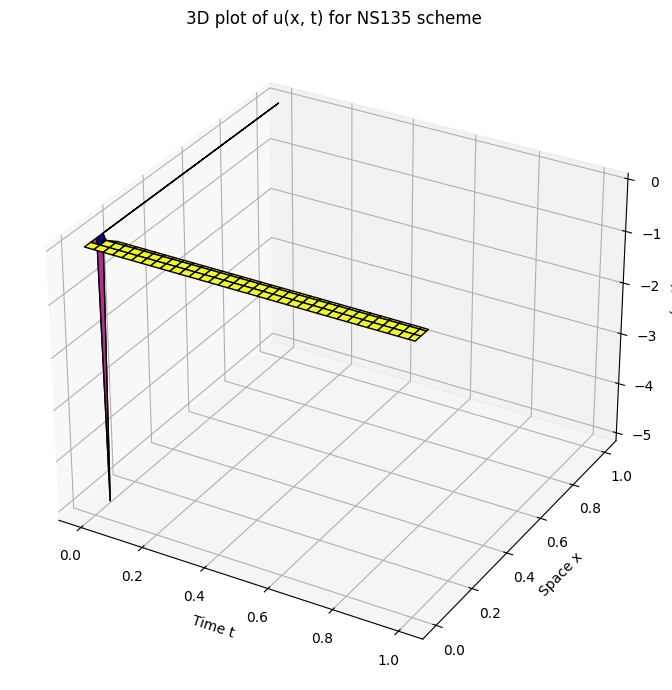

In [213]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Run your NS135 scheme
x, t, V = NS135(L, T, N, J, F, a, beta, alpha=1)

# Create meshgrid for plotting
T_mesh, X_mesh = np.meshgrid(t, x)

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_mesh, T_mesh, V, cmap='plasma', edgecolor='k')

ax.set_xlabel('Time t')
ax.set_ylabel('Space x')
ax.set_zlabel('u(x, t)')
ax.set_title('3D plot of u(x, t) for NS135 scheme')

plt.tight_layout()
plt.show()

[9.89821442e-01 9.59492974e-01 9.09631995e-01 8.41253533e-01
 7.55749574e-01 6.54860734e-01 5.40640817e-01 4.15415013e-01
 2.81732557e-01 1.42314838e-01 2.83276945e-16]
[9.89821442e-01 9.59492974e-01 9.09631995e-01 8.41253533e-01
 7.55749574e-01 6.54860734e-01 5.40640817e-01 4.15415013e-01
 2.81732557e-01 1.42314838e-01 2.83276945e-16]
[9.89821442e-01 9.59492974e-01 9.09631995e-01 8.41253533e-01
 7.55749574e-01 6.54860734e-01 5.40640817e-01 4.15415013e-01
 2.81732557e-01 1.42314838e-01 2.83276945e-16]
[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ] [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]


C:\Users\mathi\AppData\Local\Temp\ipykernel_23124\1836604103.py:41: RuntimeWarning: overflow encountered in matmul
  return np.dot(u,(u/a -1/2)@(1- u/a))


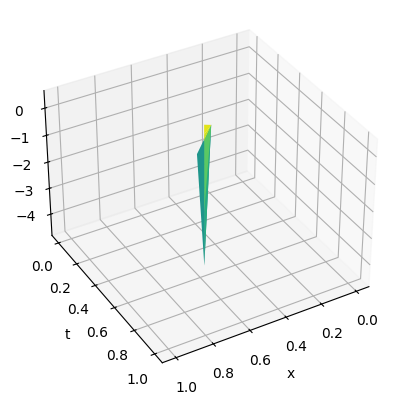

In [175]:
#Plotting

alpha=1
N=10
J=10

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 


V=NS135(L,T,N,J,F,a,beta, alpha)[2]
Time = NS135(L,T,N,J,F,a,beta, alpha)[1]
X=NS135(L,T,N,J,F,a,beta, alpha)[0]
print(Time,X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Time, V, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')


ax.view_init(35, 60)
plt.show() 